In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('paper2.png')

if img is None:
    print("Error: Image not loaded.")
else:
    # Split the image into its BGR components
    B, G, R = cv2.split(img)
    print("Image array sample:\n", img[50:200, 50:200, :])


    # Display the original image and the individual color channels
    plt.figure(figsize=(10, 10))

Image array sample:
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


<Figure size 1000x1000 with 0 Axes>

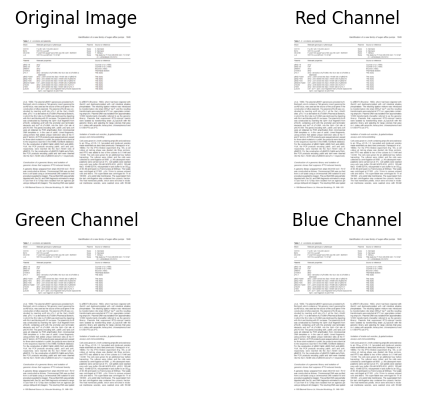

In [4]:
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(R, cmap='gray')
    plt.title('Red Channel')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(G, cmap='gray')
    plt.title('Green Channel')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(B, cmap='gray')
    plt.title('Blue Channel')
    plt.axis('off')

    plt.show()

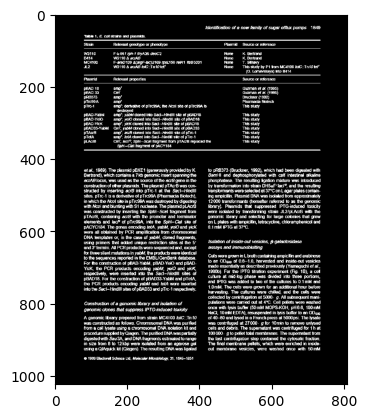

True

In [5]:
# Convert the image to grayscale
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
ret, thresh = cv2.threshold(imgray, 230, 255, cv2.THRESH_BINARY_INV)
#print(thresh)

plt.imshow(thresh, cmap='gray')
plt.show()
cv2.imwrite('C:\\binary_image.jpg', thresh)

In [6]:
#contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [7]:
img_height, img_width = imgray.shape

# Function to filter contours based on size and aspect ratio
def is_valid_contour(contour):
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    # Filter based on width and height constraints and aspect ratio
    return (0.1 * img_width < w < 0.9 * img_width) and (0.1 * img_height < h < 0.9 * img_height) and (0.5 < aspect_ratio < 2.0)

# Filter contours
valid_contours = [contour for contour in contours if is_valid_contour(contour)]

# Sort valid contours by area (largest to smallest)
valid_contours = sorted(valid_contours, key=cv2.contourArea, reverse=True)

# Print all valid contours
for i, contour in enumerate(valid_contours):
    print(f"Contour {i}:")
    print(contour)

# Optionally, draw and display all valid contours on the original image
im_with_contours = img.copy()
cv2.drawContours(im_with_contours, valid_contours, -1, (0, 255, 0), 3)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [8]:
# valid_contours = [contour for contour in contours if is_valid_contour(contour)]

# # Sort valid contours by area (largest to smallest)
# valid_contours = sorted(valid_contours, key=cv2.contourArea, reverse=True)

# # Print all valid contours and their images
# for i, contour in enumerate(valid_contours):
#     print(f"Contour {i}:")
#     print(contour)

# Get bounding rectangle for the contour
x, y, w, h = cv2.boundingRect(contour)

# Extract the region of interest (ROI) from the original image
roi = img[y:y+h, x:x+w]

# Show the ROI image
cv2.imwrite('C:\\contoured_boxes_' + str(i) + '.jpg', roi)
#....works....

NameError: name 'contour' is not defined

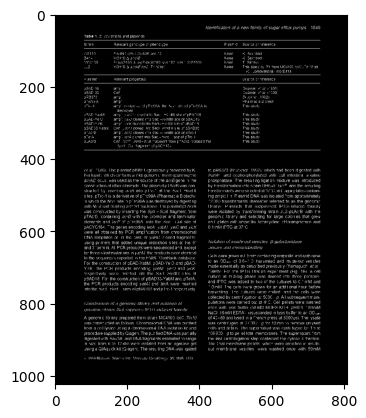

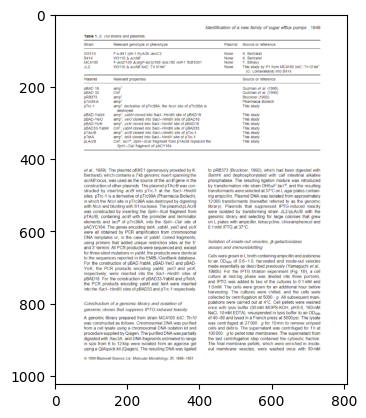

In [9]:

# Read the image
img = cv2.imread('paper2.png')

# Convert the image to grayscale
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Invert the grayscale image to make white areas black and vice versa
imgray_inv = cv2.bitwise_not(imgray)

# Apply thresholding to create a binary image
ret, thresh = cv2.threshold(imgray_inv, 130, 255, cv2.THRESH_BINARY)

# Display the thresholded image
plt.imshow(thresh, cmap='gray')
plt.show()

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the dimensions of the image
img_height, img_width = imgray.shape

# Function to filter contours based on size and aspect ratio
def is_valid_contour(contour):
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    # Filter based on width and height constraints and aspect ratio
    return (0.1 * img_width < w < 0.9 * img_width) and (0.1 * img_height < h < 0.9 * img_height) and (0.5 < aspect_ratio < 2.0)

# Filter contours
valid_contours = [contour for contour in contours if is_valid_contour(contour)]

# Sort valid contours by area (largest to smallest)
valid_contours = sorted(valid_contours, key=cv2.contourArea, reverse=True)

# Optionally, draw and display all valid contours on the original image
im_with_contours = img.copy()
cv2.drawContours(im_with_contours, valid_contours, -1, (0, 255, 0), 3)

# Display the image with contours
plt.imshow(cv2.cvtColor(im_with_contours, cv2.COLOR_BGR2RGB))
plt.show()

# Save the image with contours
cv2.imwrite('C:\\contoured_boxes.jpg', im_with_contours)

# Extract and save the region of interest (ROI) for each valid contour
for i, contour in enumerate(valid_contours):
    x, y, w, h = cv2.boundingRect(contour)
    roi = img[y:y+h, x:x+w]
    cv2.imwrite(f'C:\\contoured_box_{i}.jpg', roi)


In [10]:

# Read the image
image = cv2.imread('paper2.png')

# Convert to grayscale
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Get dimensions of the image
image.shape
rows, cols, channels = image.shape



In [11]:
# Create an empty array to store luma values
luma_values = []

# Iterate through each pixel
for y in range(rows):
    for x in range(cols):
        # Get the pixel value
        pixel_value = image[y, x]

        # Calculate luma value using the formula
        luma_value = 0.2126 * pixel_value[2] + 0.7152 * pixel_value[1] + 0.0722 * pixel_value[0]

        # Append the luma value to the list
        luma_values.append(luma_value)

# Convert the list to a NumPy array for easier manipulation
luma_array = np.array(luma_values)

# Reshape the luma_array to match the shape of the image
luma_array = luma_array.reshape((rows, cols))

# Print the shape of the luma_array
print("Shape of luma_array:", luma_array.shape)


Shape of luma_array: (1024, 810)


In [12]:
# Create an empty array to store luma values
luma_array = np.zeros((rows, cols), dtype=np.float32)

# Iterate through each pixel
for y in range(rows):
    for x in range(cols):
        # Get the pixel value
        pixel_value = image[y, x]

        # Calculate luma value using the formula
        luma_value = 0.2126 * pixel_value[2] + 0.7152 * pixel_value[1] + 0.0722 * pixel_value[0]

        # Assign the luma value to the corresponding position in luma_array
        luma_array[y, x] = luma_value

# Print the shape of the luma_array
print("Shape of luma_array:", luma_array.shape)


Shape of luma_array: (1024, 810)


In [13]:
luma_array.shape

(1024, 810)

graph for luma values per row

In [14]:
# Calculate the sum of values for each row
row_sums = np.sum(luma_array, axis=1)

# Print the shape of row_sums
print("Shape of row_sums array:", row_sums.shape)

# Print the row sums
# print("Row sums:", row_sums)

# row_sums1 = row_sums.reshape(935,1)
print(row_sums)

Shape of row_sums array: (1024,)
[206550. 206550. 206550. ... 206550. 206550. 206550.]


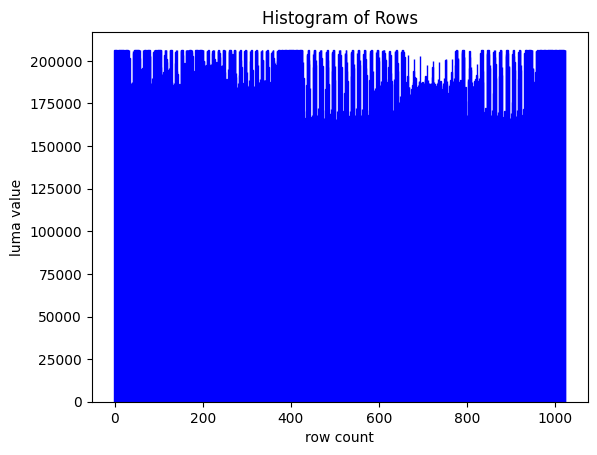

In [15]:
import matplotlib.pyplot as plt

indices = np.arange(len(row_sums))

# Create a histogram
plt.bar(indices, row_sums, edgecolor='blue')

# Add titles and labels
plt.title('Histogram of Rows')
plt.xlabel('row count')
plt.ylabel('luma value')

# Show the plot
plt.show()

Do the luma count for grayscale as it will look cleaner

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


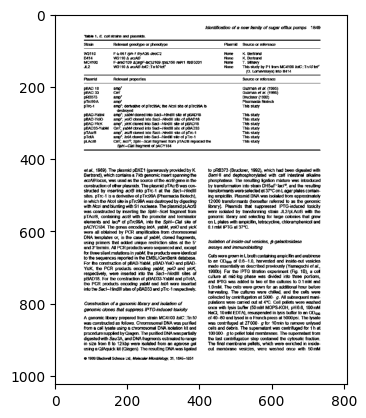

In [16]:
# Convert the image to grayscale
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
ret, thresh = cv2.threshold(imgray, 230, 255, 0)
print(thresh)

plt.imshow(thresh, cmap='gray')
plt.show()

In [17]:
trow_sums = np.sum(thresh, axis=1)

print("Shape of col_sums array:", trow_sums.shape)

print(trow_sums)

Shape of col_sums array: (1024,)
[206550 206550 206550 ... 206550 206550 206550]


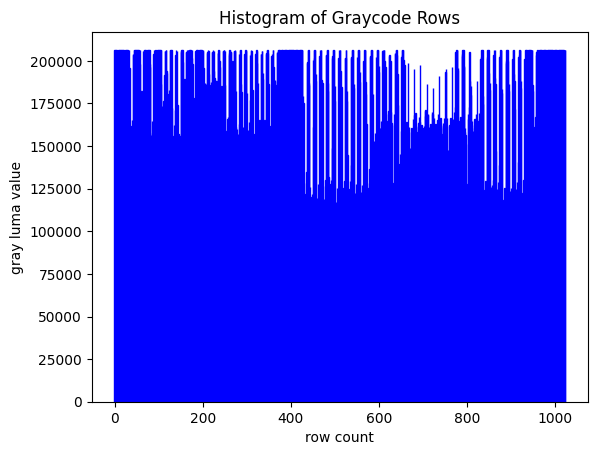

In [18]:
indices = np.arange(len(trow_sums))

# Create a histogram
plt.bar(indices, trow_sums, edgecolor='blue')

# Add titles and labels
plt.title('Histogram of Graycode Rows')
plt.xlabel('row count')
plt.ylabel('gray luma value')

# Show the plot
plt.show()

graph for luma values per column

In [19]:
col_sums = np.sum(luma_array, axis=0)

print("Shape of col_sums array:", col_sums.shape)

print(col_sums)

Shape of col_sums array: (810,)
[261120.   261120.   261120.   261120.   261120.   261120.   261120.
 261120.   261120.   261120.   261120.   261120.   261120.   261120.
 261120.   261120.   261120.   261120.   261120.   261120.   261120.
 261120.   261120.   261120.   261120.   261120.   261120.   261120.
 261120.   261120.   261120.   261120.   261120.   261120.   261120.
 261120.   261120.   261120.   261120.   261120.   261120.   261120.
 261120.   261120.   261120.   261120.   261120.   261120.   261120.
 261120.   261120.   261120.   261120.   261120.   261120.   261120.
 261120.   261120.   261120.   261120.   261120.   261120.   261120.
 261120.   261120.   261120.   261120.   261120.   261120.   261120.
 261120.   261120.   261120.   261120.   261120.   261120.   261120.
 261120.   261120.   261107.75 237854.05 209068.23 236637.36 233081.08
 222625.02 233761.16 235659.48 225828.88 231345.5  232419.55 229559.52
 234381.3  237785.81 227289.39 230116.67 230257.39 231332.44 229915

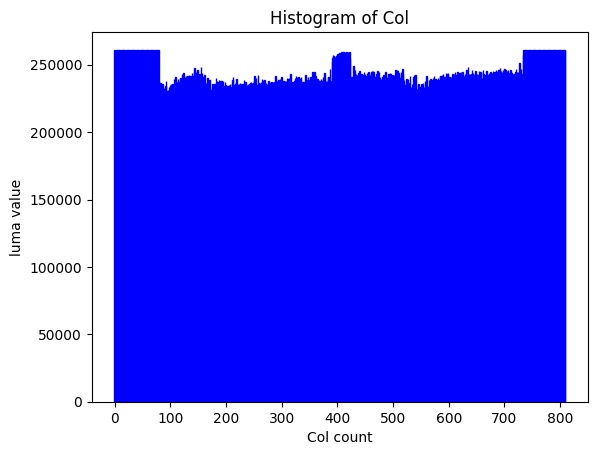

In [20]:
indices = np.arange(len(col_sums))
#returns an array of 0 through 427
#indices = np.arange(428)


# Create a histogram
plt.bar(indices, col_sums, edgecolor='blue')

# Add titles and labels
plt.title('Histogram of Col')
plt.xlabel('Col count')
plt.ylabel('luma value')

# Show the plot
plt.show()

------------------------breaking up the plot by row ----------------------


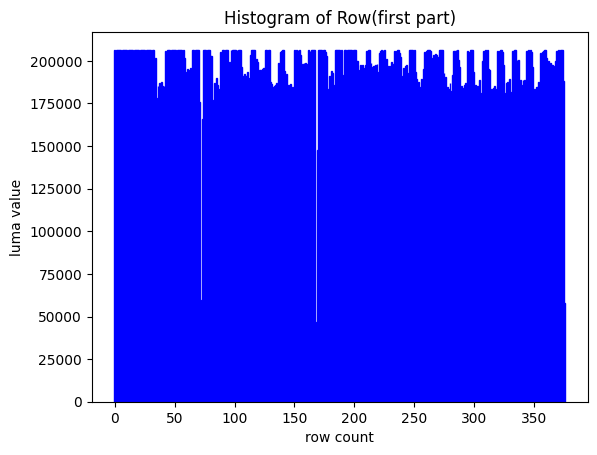

In [21]:
#indices = np.arange(len(row_sums))
#returns an array of 0 through 376
indices = np.arange(377)

#the slice will contain from index 0 to 377 not including 378
sub_row_sums=row_sums[0:377]

# Create a histogram
plt.bar(indices, sub_row_sums, edgecolor='blue')

# Add titles and labels
plt.title('Histogram of Row(first part)')
plt.xlabel('row count')
plt.ylabel('luma value')

# Show the plot
plt.show()

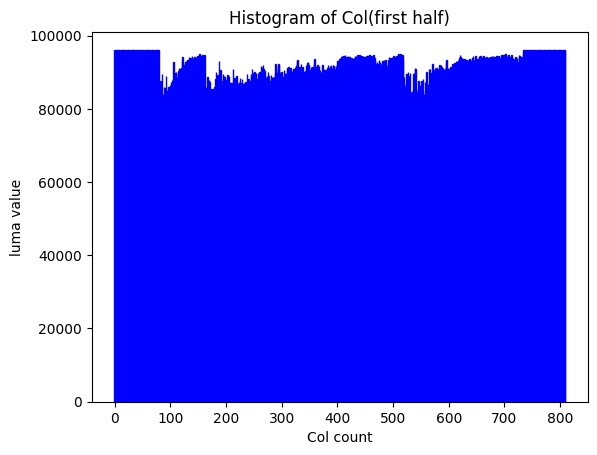

In [22]:
col_sums_half = np.sum(luma_array[0:377, 0:810], axis=0)


indices = np.arange(len(col_sums_half))

# Create a histogram
plt.bar(indices, col_sums_half, edgecolor='blue')

# Add titles and labels
plt.title('Histogram of Col(first half)')
plt.xlabel('Col count')
plt.ylabel('luma value')

# Show the plot
plt.show()

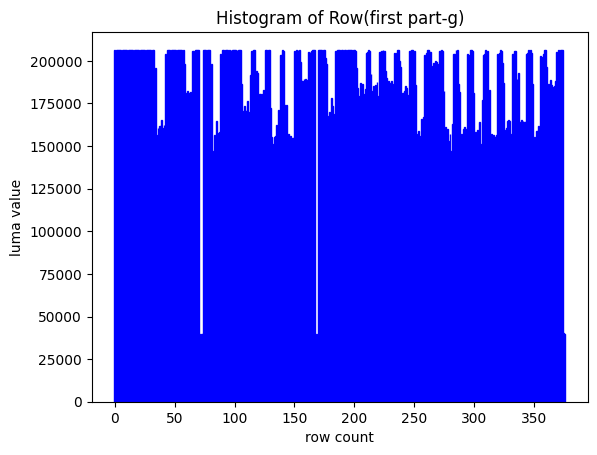

In [20]:
indices = np.arange(377)

#the slice will contain from index 0 to 377 not including 378
sub_row_sums=trow_sums[0:377]

# Create a histogram
plt.bar(indices, sub_row_sums, edgecolor='blue')

# Add titles and labels
plt.title('Histogram of Row(first part-g)')
plt.xlabel('row count')
plt.ylabel('luma value')

# Show the plot
plt.show()

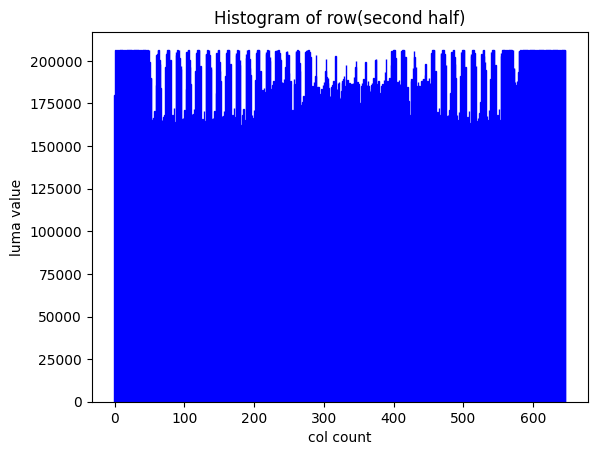

In [21]:
# indices = np.arange(len(col_sums))
indices2 = np.arange(1024-377)
sub_row_sums2=row_sums[377:]

# Create a histogram
plt.bar(indices2, sub_row_sums2, edgecolor='blue')

# Add titles and labels
plt.title('Histogram of row(second half)')
plt.xlabel('col count')
plt.ylabel('luma value')

# Show the plot
plt.show()

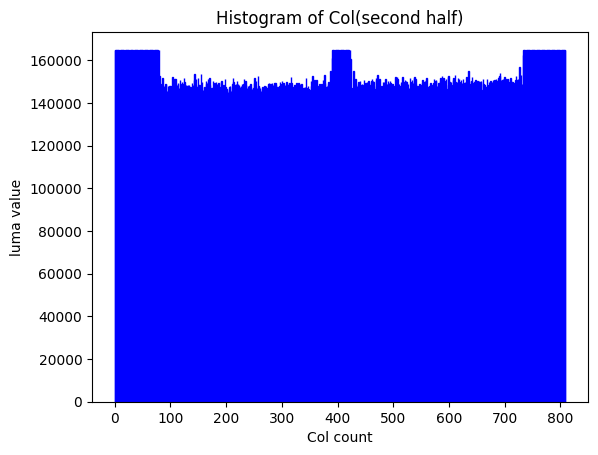

In [23]:
col_sums_half = np.sum(luma_array[377:1025, 0:810], axis=0)


indices = np.arange(len(col_sums_half))

# Create a histogram
plt.bar(indices, col_sums_half, edgecolor='blue')

# Add titles and labels
plt.title('Histogram of Col(second half)')
plt.xlabel('Col count')
plt.ylabel('luma value')

# Show the plot
plt.show()